In [1]:
#Importing  Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the Train data set
df_train=pd.read_csv('train_indessa.csv')
df_test  =  pd.read_csv('test_indessa.csv')

In [3]:
#checking the load data
df_train.head()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
df_test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [5]:
# Describing the Train dataset
df_train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [6]:
df_test.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,...,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,...,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,...,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,...,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,...,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,...,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


In [7]:
# shape of Train data
df_train.shape



(532428, 45)

In [8]:
df_test.shape

(354951, 44)

Diffrence btw train and test is only 'loan_status' column

In [9]:
# checking the information of each column of training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

In [11]:
# checking null value
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [12]:
df_test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [13]:
# checking the value counts of categorical variable of train dataset
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print('Column Name :', i)
        print(df_train[i].value_counts())
        print('\n')

Column Name : term
36 months    372793
60 months    159635
Name: term, dtype: int64


Column Name : batch_enrolled
              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64


Column Name : grade
B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64


Column Name : sub_grade
B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int6

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64


Column Name : title
Debt consolidation                        248967
Credit card refinancing                    98582
Home improvement                           24057
Other                                      19053
Debt Consolidation                          9932
                                           ...  
Investor's Paradise-Debt consolidation         1
Makingchanges2012                              1
Cleaning Out My Debt Closet                    1
Take my interest on a diet                     1
Catchin' Up                                    1
Name:

#In categorical column many levels of categories are not usefull for the next process so droping some columns

In [14]:
df_train.drop(['batch_enrolled','sub_grade','emp_title','desc','title','zip_code','addr_state','verification_status_joint'], axis =1,inplace=True)
df_test.drop(['batch_enrolled','sub_grade','emp_title','desc','title','zip_code','addr_state','verification_status_joint'], axis =1,inplace=True)

In [15]:
# seperation the continues and categorical value for analysis
df_train_categorical = df_train.select_dtypes(exclude = ['int64','float64'])

df_train_numerical = df_train.select_dtypes(include = ['int64','float64'])


In [16]:
# Converting emp_length from categorical to numeric for analysis. <1 year and 1 year are considered as 1 
# 10+ years is considered as 10

df_train['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = ['1','1','2','3','4','5','6','7','8','9','10'],inplace=True)
df_test['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = ['1','1','2','3','4','5','6','7','8','9','10'],inplace=True)

df_train['emp_length']=pd.to_numeric(df_train.emp_length)
df_test['emp_length']=pd.to_numeric(df_test.emp_length)

In [17]:
#pymnt_plan contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column
df_train.drop('pymnt_plan',axis  =1, inplace = True)
df_test.drop('pymnt_plan',axis  =1, inplace = True)

In [18]:
# application_type contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column

df_train.drop('application_type',axis  =1, inplace = True)
df_test.drop('application_type',axis  =1, inplace = True)

In [19]:
# Converting last_week_pay from categorical to numeric for analysis.values with NA are treated as 0

df_train['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
df_train['last_week_pay'].replace('NA', value= 0,inplace= True)
df_train['last_week_pay']=pd.to_numeric(df_train.last_week_pay)

df_test['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
df_test['last_week_pay'].replace('NA', value= 0,inplace= True)
df_test['last_week_pay']=pd.to_numeric(df_test.last_week_pay)

In [20]:
# clubbing grades E,F,G into others since they have very less count

df_train['grade'].replace(['E','F','G'], 'Others', inplace=True)
df_test['grade'].replace(['E','F','G'], 'Others', inplace=True)

In [22]:
# clubbing OTHERS,NONE,ANY into OTHERS since they have very less count

df_train['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)
df_test['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)

In [23]:
# Majority of he loans were taken for debt consolidation, home improvement and credit card
# Other purposes cnstitute very small portion. So, Other types of purposes can be clubbed together

df_train['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)
df_test['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)

In [24]:
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
grade                               0
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_r

# Missing Value Treatment

Fill Missing values from mean & median


In [28]:
df_train['collections_12_mths_ex_med']=df_train['collections_12_mths_ex_med'].fillna(df_train['collections_12_mths_ex_med'].mean())


In [29]:
df_train['mths_since_last_major_derog']=df_train['mths_since_last_major_derog'].fillna(df_train['mths_since_last_major_derog'].mean())


In [30]:
df_train['delinq_2yrs']=df_train['delinq_2yrs'].fillna(df_train['delinq_2yrs'].mean())

In [31]:
df_train['inq_last_6mths']=df_train['inq_last_6mths'].fillna(df_train['inq_last_6mths'].mean())

In [32]:
df_train['acc_now_delinq']=df_train['acc_now_delinq'].fillna(df_train['acc_now_delinq'].mean())

In [33]:
df_train['emp_length']=df_train['emp_length'].fillna(df_train['emp_length'].mode()[0])

In [34]:
df_train['annual_inc']=df_train['annual_inc'].fillna(df_train['annual_inc'].mode()[0])

In [35]:
df_train['open_acc']=df_train['open_acc'].fillna(df_train['open_acc'].mode()[0])

In [36]:
df_train['pub_rec']=df_train['pub_rec'].fillna(df_train['pub_rec'].mode()[0])

In [37]:
df_train['revol_util']=df_train['revol_util'].fillna(df_train['revol_util'].mode()[0])

In [38]:
df_train['total_acc']=df_train['total_acc'].fillna(df_train['total_acc'].mode()[0])

In [39]:
df_train['mths_since_last_delinq']=df_train['mths_since_last_delinq'].fillna(df_train['mths_since_last_delinq'].mode()[0])

In [40]:
df_train['mths_since_last_record']=df_train['mths_since_last_record'].fillna(df_train['mths_since_last_record'].mode()[0])

In [41]:
df_train['tot_coll_amt']=df_train['tot_coll_amt'].fillna(df_train['tot_coll_amt'].mode()[0])

In [42]:
df_train['tot_cur_bal']=df_train['tot_cur_bal'].fillna(df_train['tot_cur_bal'].mode()[0])

In [43]:
df_train['total_rev_hi_lim']=df_train['total_rev_hi_lim'].fillna(df_train['total_rev_hi_lim'].mode()[0])

In [44]:
df_test['collections_12_mths_ex_med']=df_test['collections_12_mths_ex_med'].fillna(df_test['collections_12_mths_ex_med'].mean())

df_test['mths_since_last_major_derog']=df_test['mths_since_last_major_derog'].fillna(df_test['mths_since_last_major_derog'].mean())

df_test['delinq_2yrs']=df_test['delinq_2yrs'].fillna(df_test['delinq_2yrs'].mean())

df_test['inq_last_6mths']=df_test['inq_last_6mths'].fillna(df_test['inq_last_6mths'].mean())

df_test['acc_now_delinq']=df_test['acc_now_delinq'].fillna(df_test['acc_now_delinq'].mean())

df_test['emp_length']=df_test['emp_length'].fillna(df_test['emp_length'].mode()[0])

df_test['annual_inc']=df_test['annual_inc'].fillna(df_test['annual_inc'].mode()[0])

df_test['open_acc']=df_test['open_acc'].fillna(df_test['open_acc'].mode()[0])

df_test['pub_rec']=df_test['pub_rec'].fillna(df_test['pub_rec'].mode()[0])

df_test['revol_util']=df_test['revol_util'].fillna(df_test['revol_util'].mode()[0])

df_test['total_acc']=df_test['total_acc'].fillna(df_test['total_acc'].mode()[0])

df_test['mths_since_last_delinq']=df_test['mths_since_last_delinq'].fillna(df_test['mths_since_last_delinq'].mode()[0])

df_test['mths_since_last_record']=df_test['mths_since_last_record'].fillna(df_test['mths_since_last_record'].mode()[0])

df_test['tot_coll_amt']=df_test['tot_coll_amt'].fillna(df_test['tot_coll_amt'].mode()[0])

df_test['tot_cur_bal']=df_test['tot_cur_bal'].fillna(df_test['tot_cur_bal'].mode()[0])

df_test['total_rev_hi_lim']=df_test['total_rev_hi_lim'].fillna(df_test['total_rev_hi_lim'].mode()[0])

In [45]:
df_train.shape

(532428, 35)

In [46]:
df_train.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
last_week_pay                  0
acc_now_de

In [48]:
df_test.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
last_week_pay                  0
acc_now_de

In [49]:
# applying One hot encoding 
dummy_cols=['term','grade','home_ownership','verification_status','purpose','initial_list_status']

df_train = pd.get_dummies(df_train, columns = dummy_cols, drop_first = True)
df_test = pd.get_dummies(df_test, columns = dummy_cols, drop_first = True)

In [50]:
# checking the null value for train dataset
df_train.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
collections_12_mths_ex_med             0
mths_since_last_major_derog            0
last_week_pay                          0
acc_now_delinq  

In [51]:
df_test.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
collections_12_mths_ex_med             0
mths_since_last_major_derog            0
last_week_pay                          0
acc_now_delinq  

<AxesSubplot:>

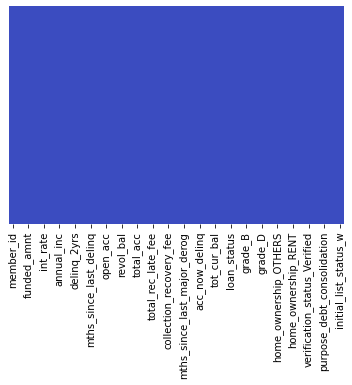

In [52]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<AxesSubplot:>

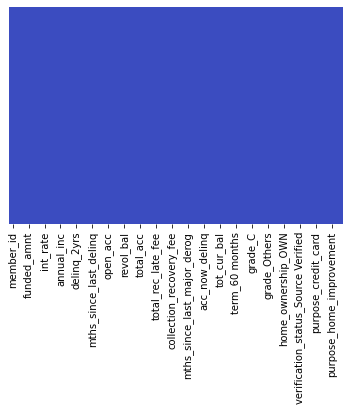

In [53]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

there is no null value and missing value in train & test

<AxesSubplot:>

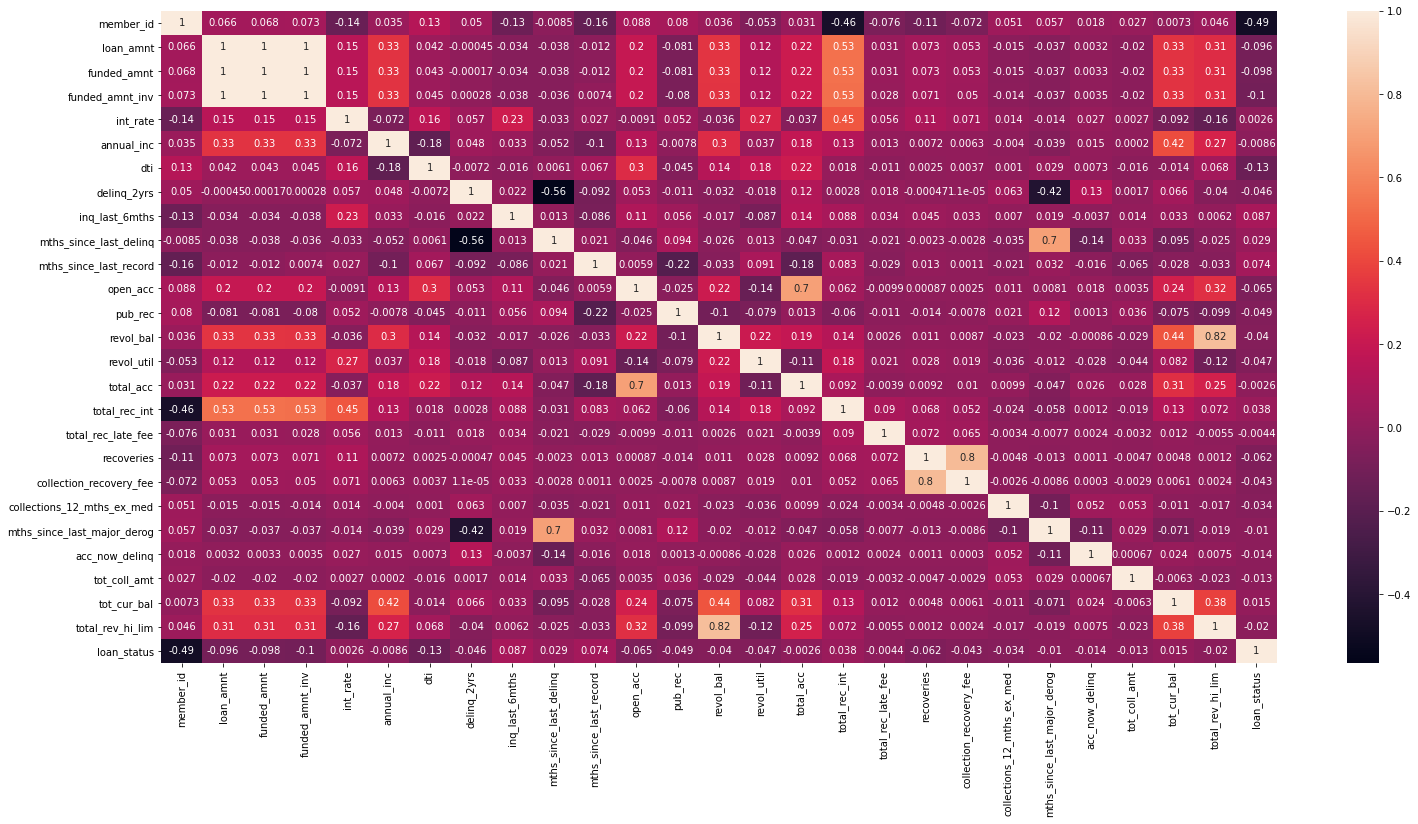

In [54]:
corr = df_train_numerical.corr()
plt.figure(figsize = (25,12))
sns.heatmap(corr,annot = True)

droping some variable that ave corelation

In [55]:
# Dropig 'funded_amnt','funded_amnt_inv' columns
df_train.drop(['funded_amnt','funded_amnt_inv'],axis = 1, inplace = True)
df_test.drop(['funded_amnt','funded_amnt_inv'],axis = 1, inplace = True)

there are no missing value in both training and test 

# Model Building

In [58]:
x=df_train.drop('loan_status',axis=1)

In [59]:
x

,member_id,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,grade_Others,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,initial_list_status_w
0,58189336,14350,19.19,9.0,28700.0,33.88,0.0,1.0,50.0,75.0,...,1,0,1,0,1,0,0,1,0,0
1,70011223,4800,10.99,1.0,65000.0,3.64,0.0,1.0,31.0,70.0,...,0,0,0,0,1,0,0,0,1,1
2,70255675,10000,7.26,2.0,45000.0,18.42,0.0,0.0,31.0,70.0,...,0,0,1,0,0,0,0,1,0,1
3,1893936,15000,19.72,10.0,105000.0,14.97,0.0,2.0,46.0,70.0,...,0,0,0,1,0,0,0,1,0,0
4,7652106,16000,10.64,10.0,52000.0,20.16,0.0,0.0,31.0,70.0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,12.49,10.0,75000.0,14.53,0.0,0.0,31.0,51.0,...,0,0,0,0,1,0,0,1,0,0
532424,29403184,12000,14.99,10.0,59000.0,22.97,0.0,0.0,31.0,81.0,...,0,0,0,0,0,0,0,1,0,1
532425,7357607,18725,20.80,8.0,42504.0,27.27,0.0,1.0,26.0,70.0,...,1,0,0,1,0,1,0,1,0,0
532426,23182668,21000,16.29,1.0,50000.0,14.91,0.0,1.0,31.0,70.0,...,0,0,0,1,1,0,1,0,0,1


In [62]:
y=df_train['loan_status']

In [63]:
y

0         0
1         0
2         0
3         0
4         0
         ..
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, Length: 532428, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [65]:
x_std=std.fit_transform(x)
df_test_std=std.transform(df_test)

In [66]:
x_std

array([[ 0.96113044, -0.04832533,  1.35789153, ...,  0.83084694,
        -0.24901344, -0.97110259],
       [ 1.45122889, -1.18059155, -0.51442259, ..., -1.20359111,
         4.01584743,  1.02975732],
       [ 1.4613631 , -0.56406963, -1.36609718, ...,  0.83084694,
        -0.24901344,  1.02975732],
       ...,
       [-1.14619399,  0.47038302,  1.72550442, ...,  0.83084694,
        -0.24901344, -0.97110259],
       [-0.49013647,  0.74011136,  0.69573166, ..., -1.20359111,
        -0.24901344,  1.02975732],
       [ 0.46086719, -0.56406963, -1.56474515, ...,  0.83084694,
        -0.24901344, -0.97110259]])

In [67]:
df_test_std

array([[-0.95631982, -0.08982199,  0.68431511, ..., -1.20359111,
        -0.24901344, -0.97110259],
       [ 0.16490903,  0.14730182, -0.85691908, ..., -1.20359111,
        -0.24901344,  1.02975732],
       [-0.2904284 , -0.43957962,  0.54046658, ...,  0.83084694,
        -0.24901344,  1.02975732],
       ...,
       [-1.41375091, -0.08982199,  0.97429546, ..., -1.20359111,
         4.01584743, -0.97110259],
       [ 0.74734312,  0.62154945, -1.36609718, ..., -1.20359111,
        -0.24901344,  1.02975732],
       [-1.40999906, -1.42957156, -1.31358106, ...,  0.83084694,
        -0.24901344, -0.97110259]])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((425942, 40), (106486, 40), (425942,), (106486,))

In [77]:
x_train

,member_id,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,grade_Others,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,initial_list_status_w
378525,6207591,10000,7.69,10.0,100000.00,13.60,0.0,0.0,31.0,105.0,...,0,0,1,0,0,0,1,0,0,1
13282,64486287,14000,13.33,5.0,90000.00,12.40,1.0,1.0,14.0,70.0,...,0,0,0,1,1,0,0,0,0,1
200997,53102461,5675,5.32,1.0,87500.00,18.32,0.0,0.0,31.0,70.0,...,0,0,0,0,0,0,0,1,0,1
480451,12430410,8000,14.47,10.0,48500.00,31.28,0.0,1.0,80.0,81.0,...,0,0,0,0,1,0,0,1,0,0
288890,51994440,35000,11.53,5.0,81274.00,8.28,0.0,0.0,32.0,70.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108445,22481345,11000,11.67,10.0,45160.96,12.30,0.0,2.0,31.0,70.0,...,0,0,0,0,0,1,0,1,0,1
299741,11959141,17325,13.98,2.0,52000.00,13.02,0.0,0.0,31.0,70.0,...,0,0,1,0,0,0,0,1,0,1
105595,56892215,4500,9.17,3.0,40000.00,5.70,0.0,0.0,55.0,70.0,...,0,0,0,1,1,0,1,0,0,1
443712,48401878,24625,19.52,10.0,65000.00,23.32,0.0,2.0,31.0,70.0,...,1,0,0,0,0,1,0,1,0,0


In [78]:
y_train

378525    0
13282     0
200997    0
480451    1
288890    0
         ..
108445    0
299741    1
105595    0
443712    0
345353    0
Name: loan_status, Length: 425942, dtype: int64

In [79]:
x_test

,member_id,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,grade_Others,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,initial_list_status_w
130854,25386106,35000,23.43,10.0,135000.0,27.14,0.0,2.0,31.0,70.0,...,1,0,0,0,1,0,0,1,0,0
442245,61556649,19000,9.99,10.0,79000.0,29.28,0.0,2.0,31.0,70.0,...,0,0,0,1,0,0,0,1,0,0
478033,12619165,6600,14.98,10.0,80000.0,13.11,2.0,0.0,2.0,70.0,...,0,0,1,0,1,0,1,0,0,0
364282,40473262,8000,6.99,2.0,60000.0,13.72,0.0,0.0,31.0,70.0,...,0,0,1,0,0,1,0,0,0,0
194939,42563178,10000,9.49,4.0,36000.0,17.93,2.0,0.0,12.0,70.0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492218,72147604,4500,9.17,1.0,20000.0,10.07,0.0,0.0,31.0,70.0,...,0,0,0,1,1,0,1,0,0,1
396351,9380199,29825,14.30,10.0,198000.0,24.50,1.0,0.0,7.0,70.0,...,0,0,0,0,1,0,0,1,0,0
222255,24735369,15000,15.61,10.0,73440.0,14.77,0.0,3.0,31.0,59.0,...,0,0,0,1,0,0,0,0,0,0
82300,19135000,12000,16.29,10.0,48000.0,33.78,1.0,0.0,11.0,70.0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
y_test

130854    0
442245    0
478033    1
364282    0
194939    0
         ..
492218    0
396351    0
222255    1
82300     0
221932    0
Name: loan_status, Length: 106486, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression

In [86]:
paramgrid_logit = { "penalty": ['elasticnet'],
                      "C": [0.01],
                      "solver":['saga'],
                      "l1_ratio": [0.5]
                      }

logit =LogisticRegression()
gridsearch_logit = GridSearchCV(estimator=logit,
                            param_grid=paramgrid_logit,
                            cv=3,scoring='roc_auc')

In [88]:
# Fitting the model to training data
gridsearch_logit.fit(x_train, y_train)
print(gridsearch_logit.best_params_)
bestgrid_logit = gridsearch_logit.best_estimator_
bestgrid_logit

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


LogisticRegression(C=0.01, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [90]:
# Predicting the output class and probabilities of training set
y_train_predict_logit = bestgrid_logit.predict(x_train)
y_train_predict_prob_logit = bestgrid_logit.predict_proba(x_train)

AUC score for Logit model: 0.839


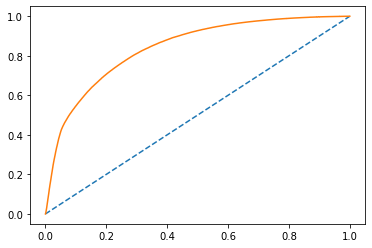

In [91]:
# keep probabilities for the positive outcome only
probslogit = y_train_predict_prob_logit[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probslogit)
print('AUC score for Logit model: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probslogit)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

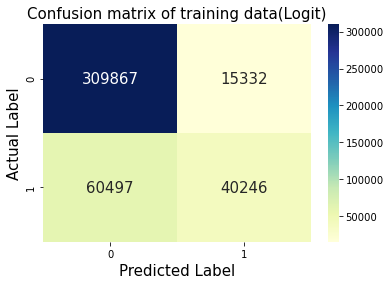

In [92]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_logit), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(Logit)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [93]:
logit_metrics=classification_report(y_train, y_train_predict_logit,output_dict=True)
df3=pd.DataFrame(logit_metrics).transpose()
logit_train_acc=round(df3.loc["accuracy"][0],2)
logit_train_precision=round(df3.loc["1"][0],2)
logit_train_recall=round(df3.loc["1"][1],2)
logit_train_f1=round(df3.loc["1"][2],2)
print ('Precision of Logit Model ',logit_train_precision)
print ('Recall of Logit Model ',logit_train_recall)
print ('F1 Score of Logit Model ',logit_train_f1)
round(df3,2)

Precision of Logit Model  0.72
Recall of Logit Model  0.4
F1 Score of Logit Model  0.51


,precision,recall,f1-score,support
0,0.84,0.95,0.89,325199.00
1,0.72,0.40,0.51,100743.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.78,0.68,0.70,425942.00
weighted avg,0.81,0.82,0.80,425942.00


In [130]:
#Importing XG Boost
!pip install xgboost
import xgboost as xgb

In [132]:
model_xgb = xgb.XGBClassifier(eval_metric=["auc"])
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['auc'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [133]:
y_train_predict_xgb = model_xgb.predict(x_train)
y_train_predict_prob_xgb = model_xgb.predict_proba(x_train)

AUC score for Gradient Boosting model: 0.980


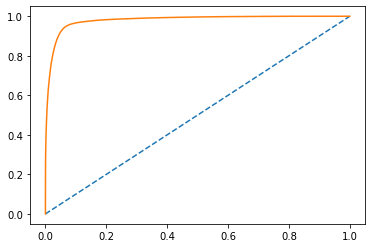

In [134]:
# probabilities for the positive outcome only
probsxgb = y_train_predict_prob_xgb[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probsxgb)
print('AUC score for Gradient Boosting model: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probsxgb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

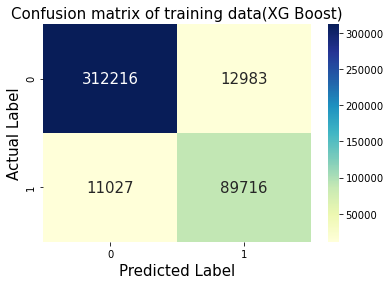

In [135]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_xgb), annot = True, cmap = 'YlGnBu', fmt = '.6g', annot_kws = {'size':15})
plt.title('Confusion matrix of training data(XG Boost)', fontsize = 15)
plt.ylabel('Actual Label',fontsize = 15)
plt.xlabel('Predicted Label',fontsize = 15)
plt.show()

In [136]:
xgb_metrics=classification_report(y_train, y_train_predict_xgb,output_dict=True)
df5=pd.DataFrame(xgb_metrics).transpose()
xgb_train_acc=round(df5.loc["accuracy"][0],2)
xgb_train_precision=round(df5.loc["1"][0],2)
xgb_train_recall=round(df5.loc["1"][1],2)
xgb_train_f1=round(df5.loc["1"][2],2)
print ('Precision of XG Boost Model ',xgb_train_precision)
print ('Recall of XG Boost Model ',xgb_train_recall)
print ('F1 Score of XG Boost Model ',xgb_train_f1)
round(df5,2)

Precision of XG Boost Model  0.87
Recall of XG Boost Model  0.89
F1 Score of XG Boost Model  0.88


,precision,recall,f1-score,support
0,0.97,0.96,0.96,325199.00
1,0.87,0.89,0.88,100743.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.92,0.93,0.92,425942.00
weighted avg,0.94,0.94,0.94,425942.00


Out of 2 models, XG Boost model has given better AUC score of 0.98.

